# Graph 
Graph is a non linear data structure. It is used to represent connection between a node to any other node. A tree is also a type of graph, but it is a disconnected graph.

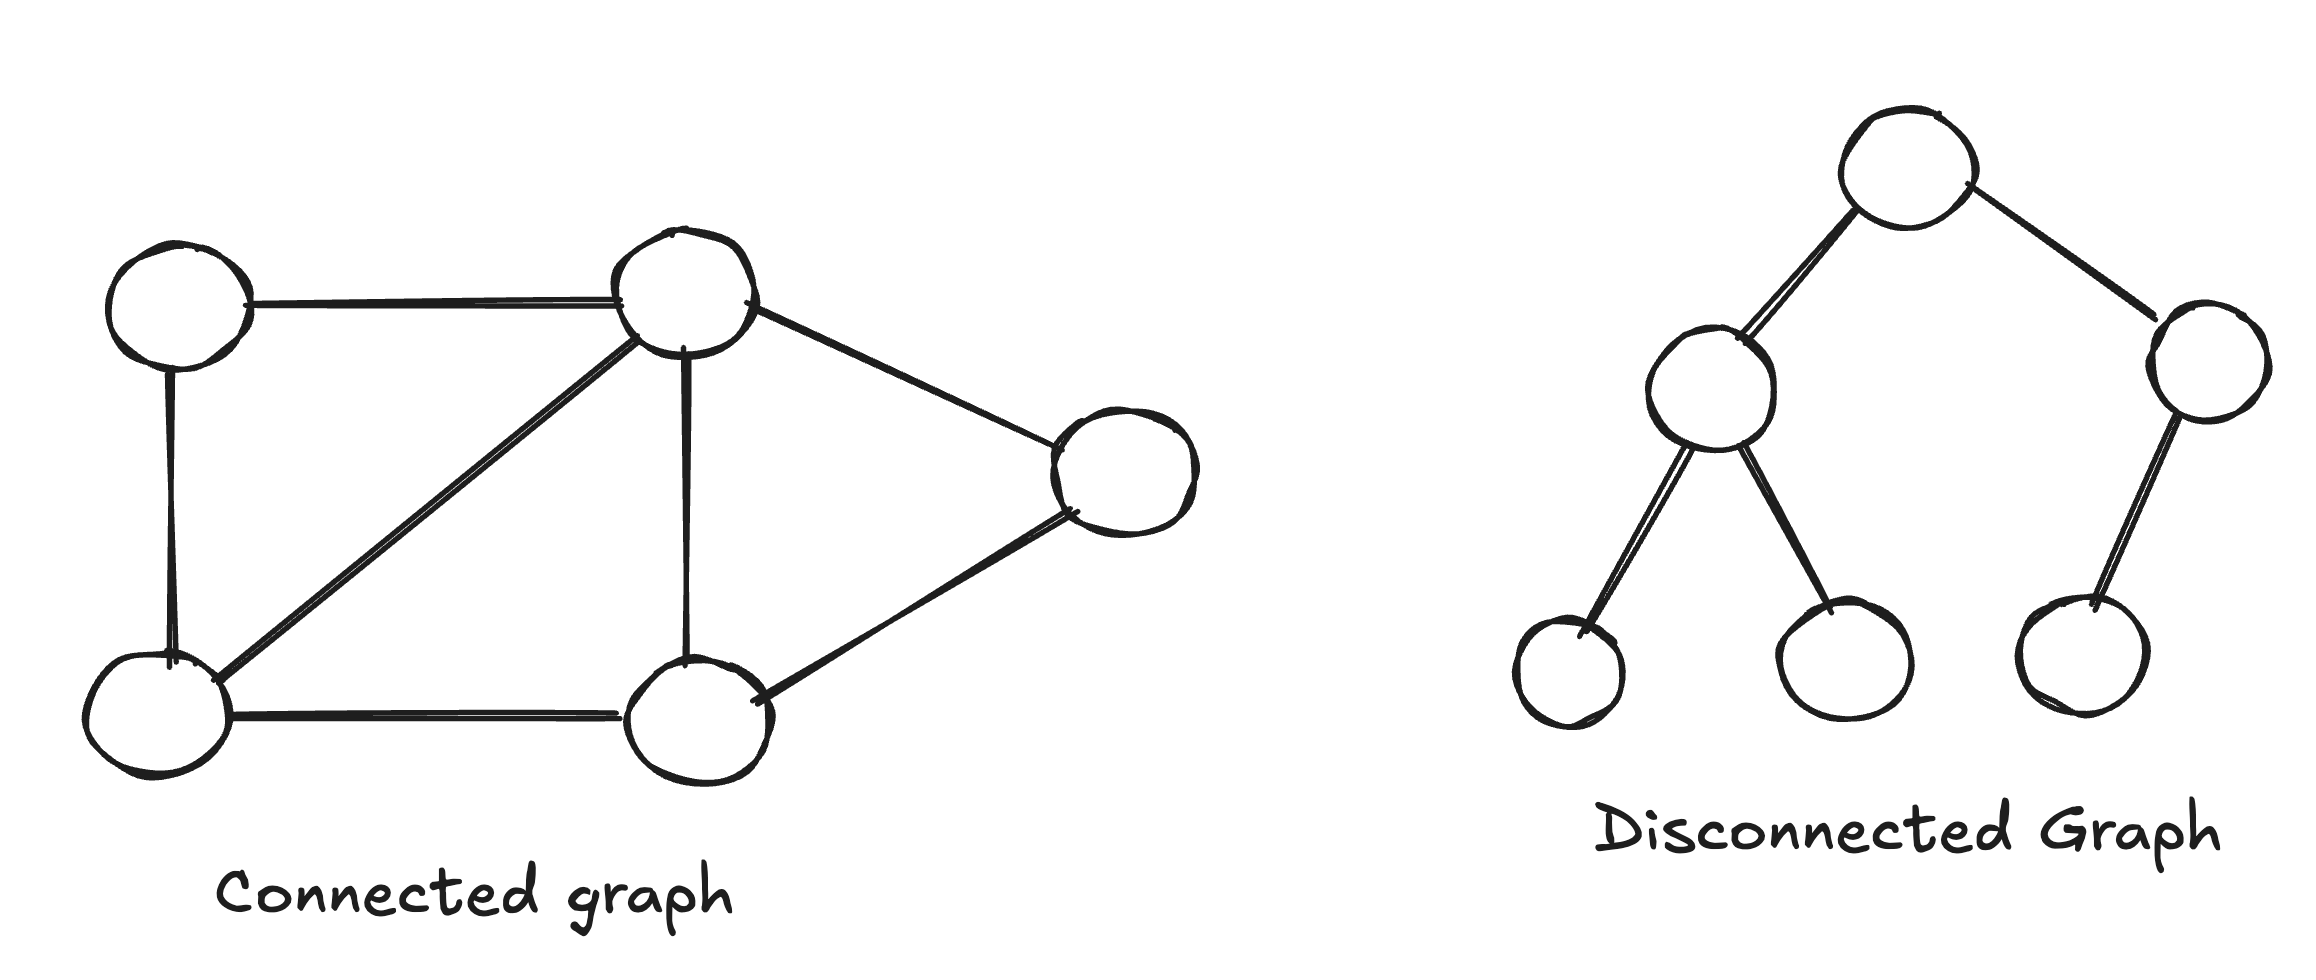

### Definition:
A graph is a pair of edges and vertices.\
G = (V, E)\
where:
- V: Vertices (V1, V2, V3)
- E: Edges (E1=(V1, V2), E2=(V1, V3), E3=(V2, V3))

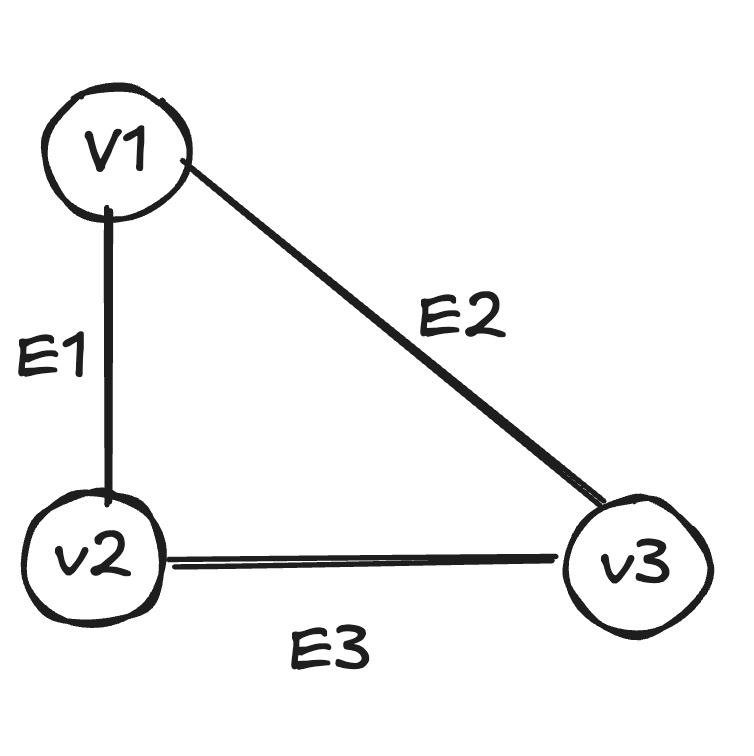

### Directed and Undirected Graph
#### Definition
Directed Graph: A graph where a edges have direction. In directed graph, the edges have the vertex in ordered pairs.
Example: Internet. All the pages of the internet are connected to each other.

Indegree of a vertex -> No of egdes directed towards a vertex
Outdegree of a vertex -> No of edges directing outside a vertex.

Max number of edges = |V| * (|V| - 1)

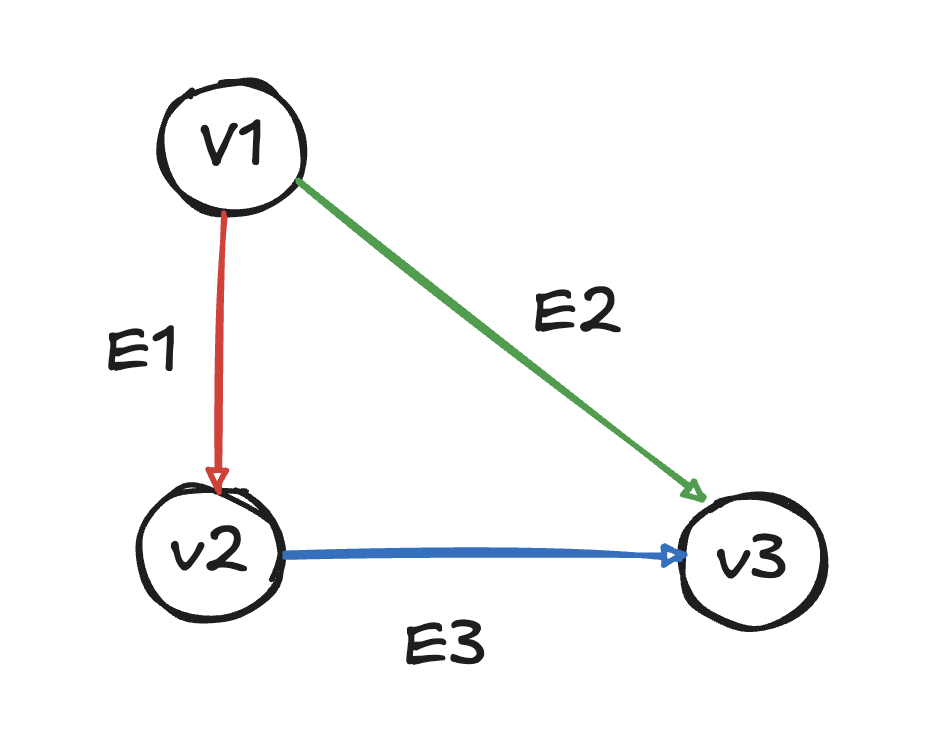

E1 = (V1, V2)

#### Definition
Undirected Graph: A graph whose edges don't have any direction. In undirected graph, the edges have the vertex pairs have undefined order.
Example: Social Media where each friend is connected to one another. 
- Number of degree of a vertex -> No of edges directed towards and outside a vertex.
- Sum of degree = 2 * |E|
- Max number of edges = |V| * (|V| - 1)/2

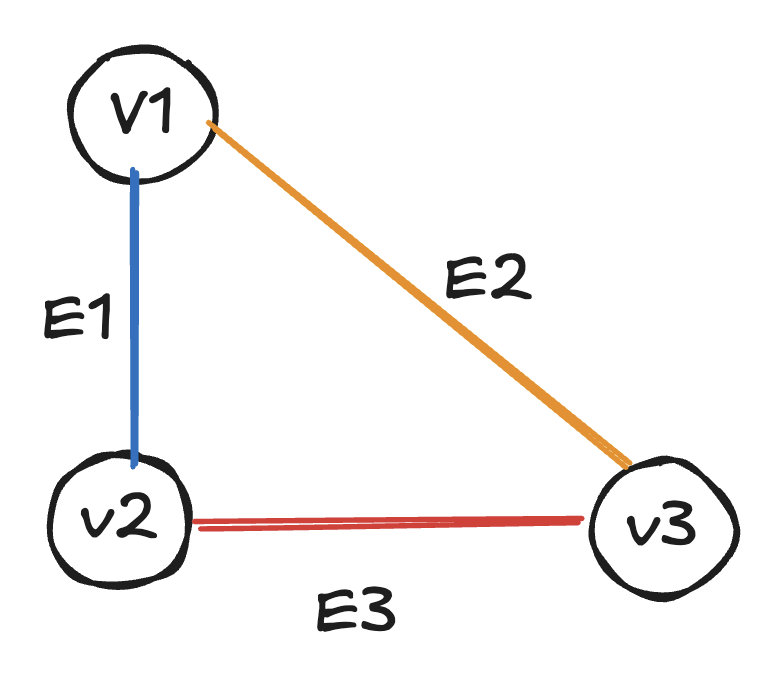

E1 = (V1, V2) or (V2, V1)

## More terminologies of a graph:
### Walk
A walk is a series of vertices which is followed by follwoing edges.

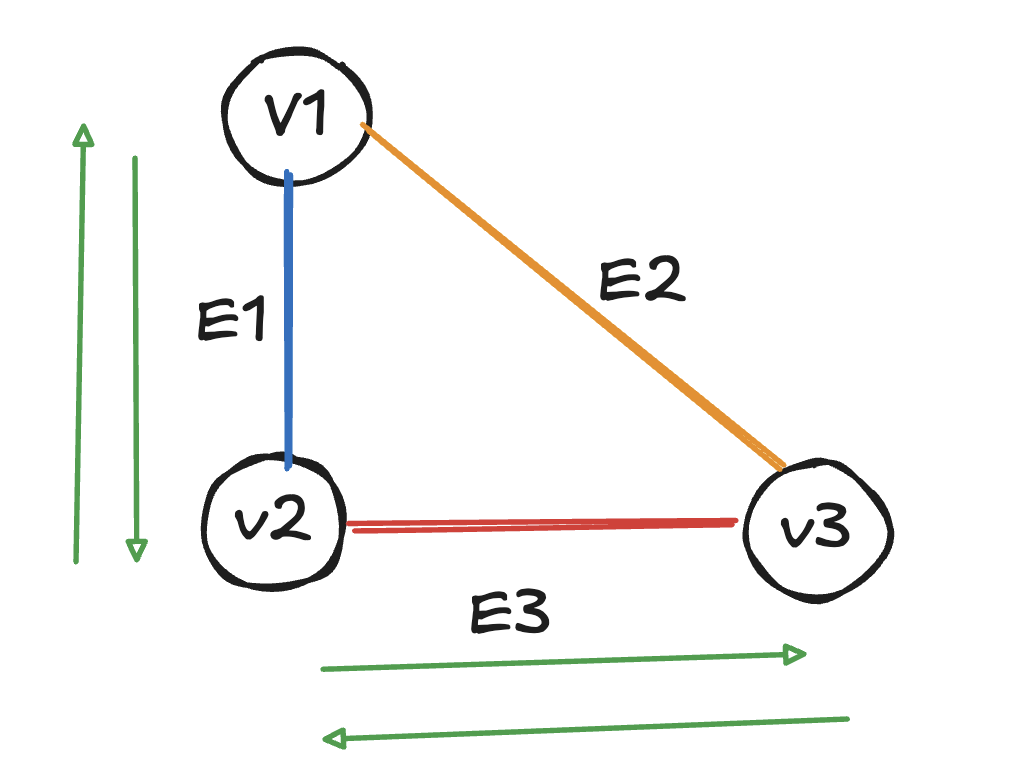

Here walk is (V1, V2, V3, V3, V2, V1)

(It is also called path)

### Path
A path is a sequence of vertices which is non repetative. It is a special type of walk.

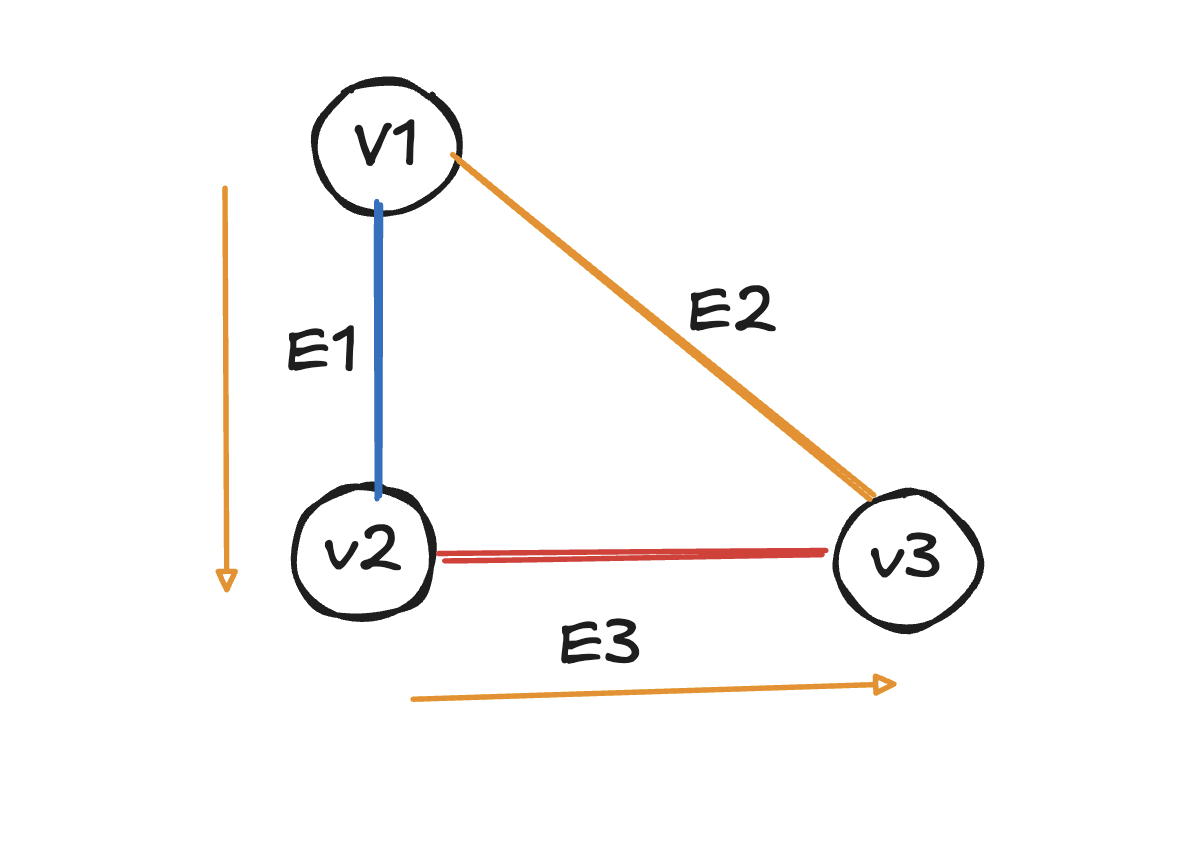

Here the path is (V1, V2, V3)
We can;t have repetative vertices and edges

## Cyclic
A graph is called cyclic when the walk starts from a vertex ends at the same vertex.

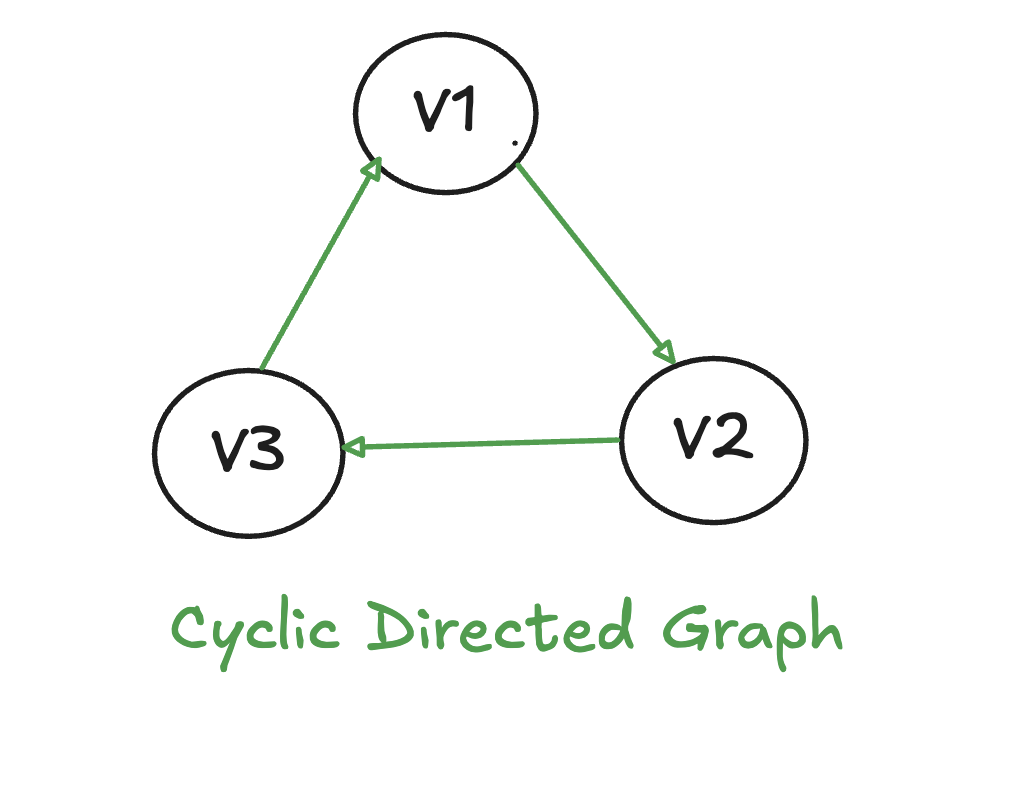
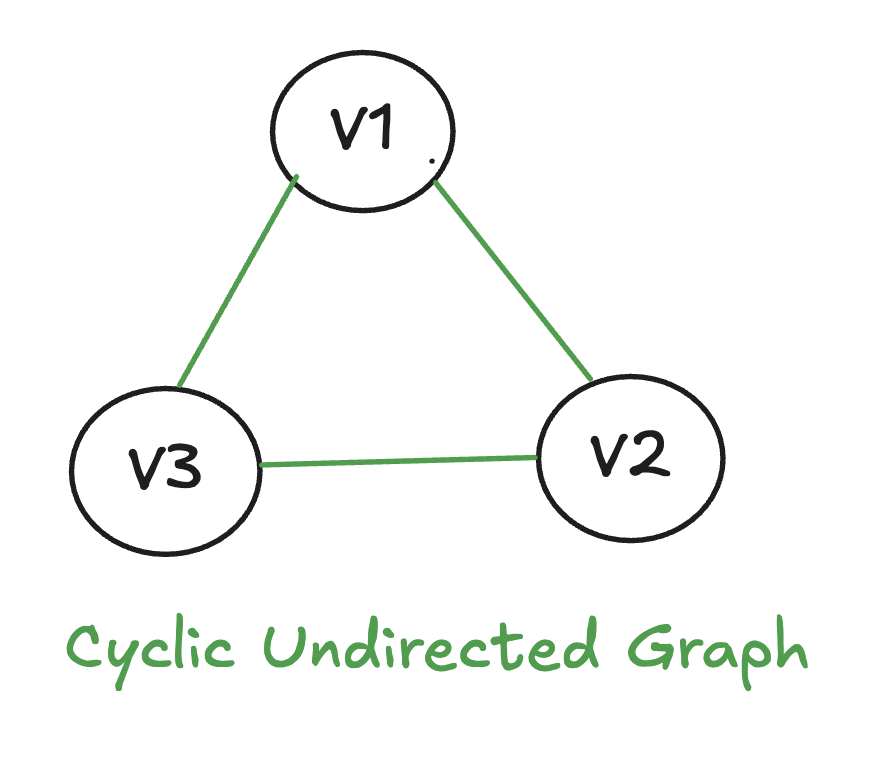

## Asyclic
A graph is called asyclic when it doens't have any cycles

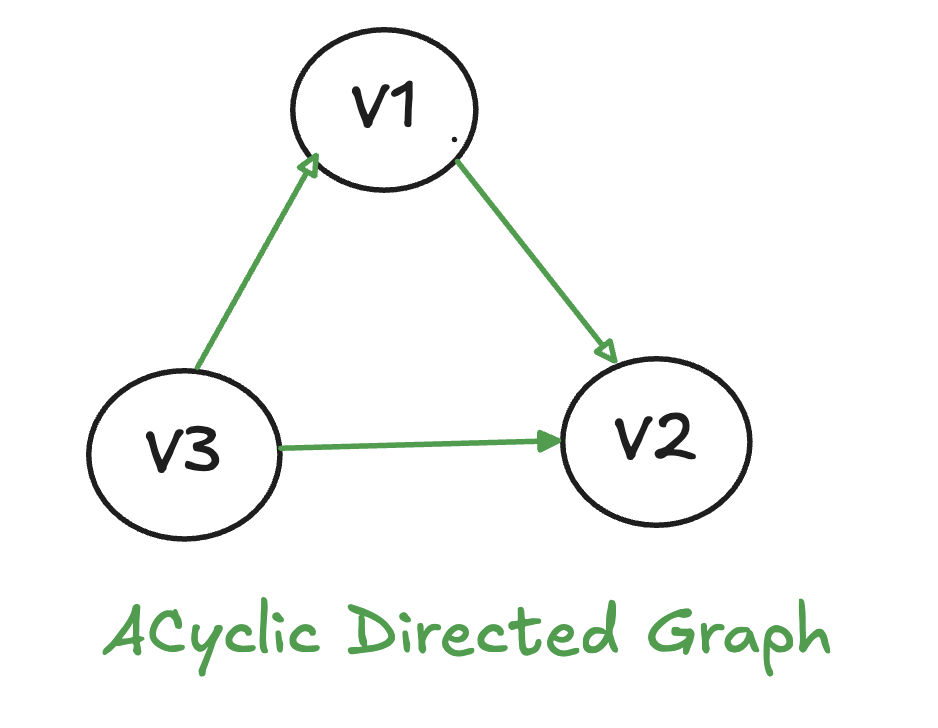
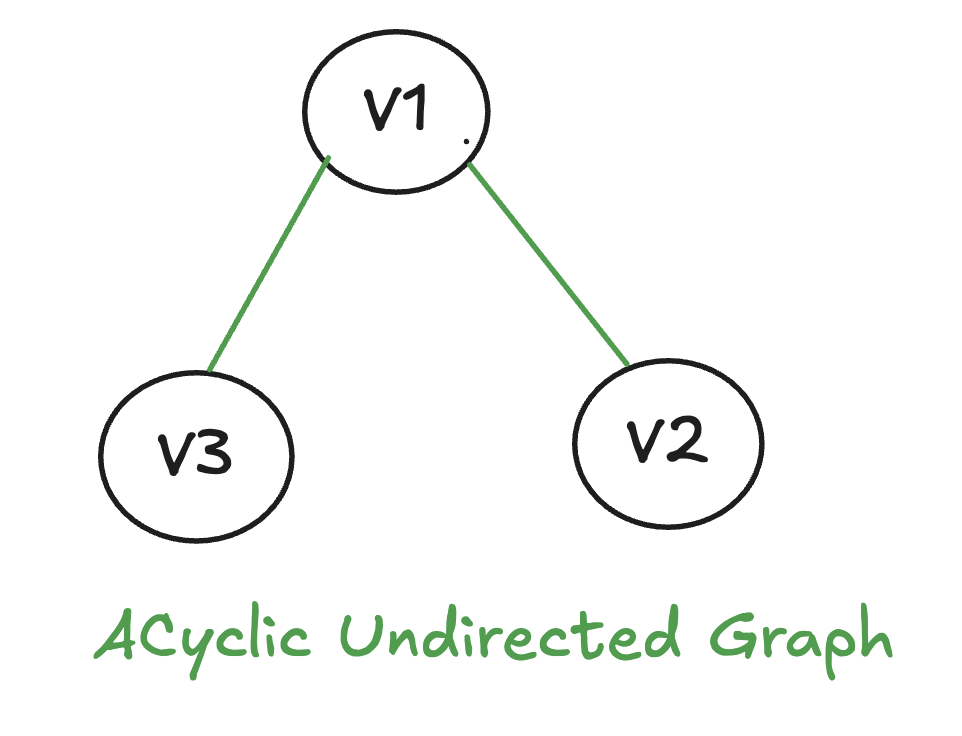

## Weighted and Unweighted Graph
A weighted graph is a graph which has weighted edges. Where as an unweighted graph has no weights assigned to the edges.
Example of weights graph: A* algo for GPS.

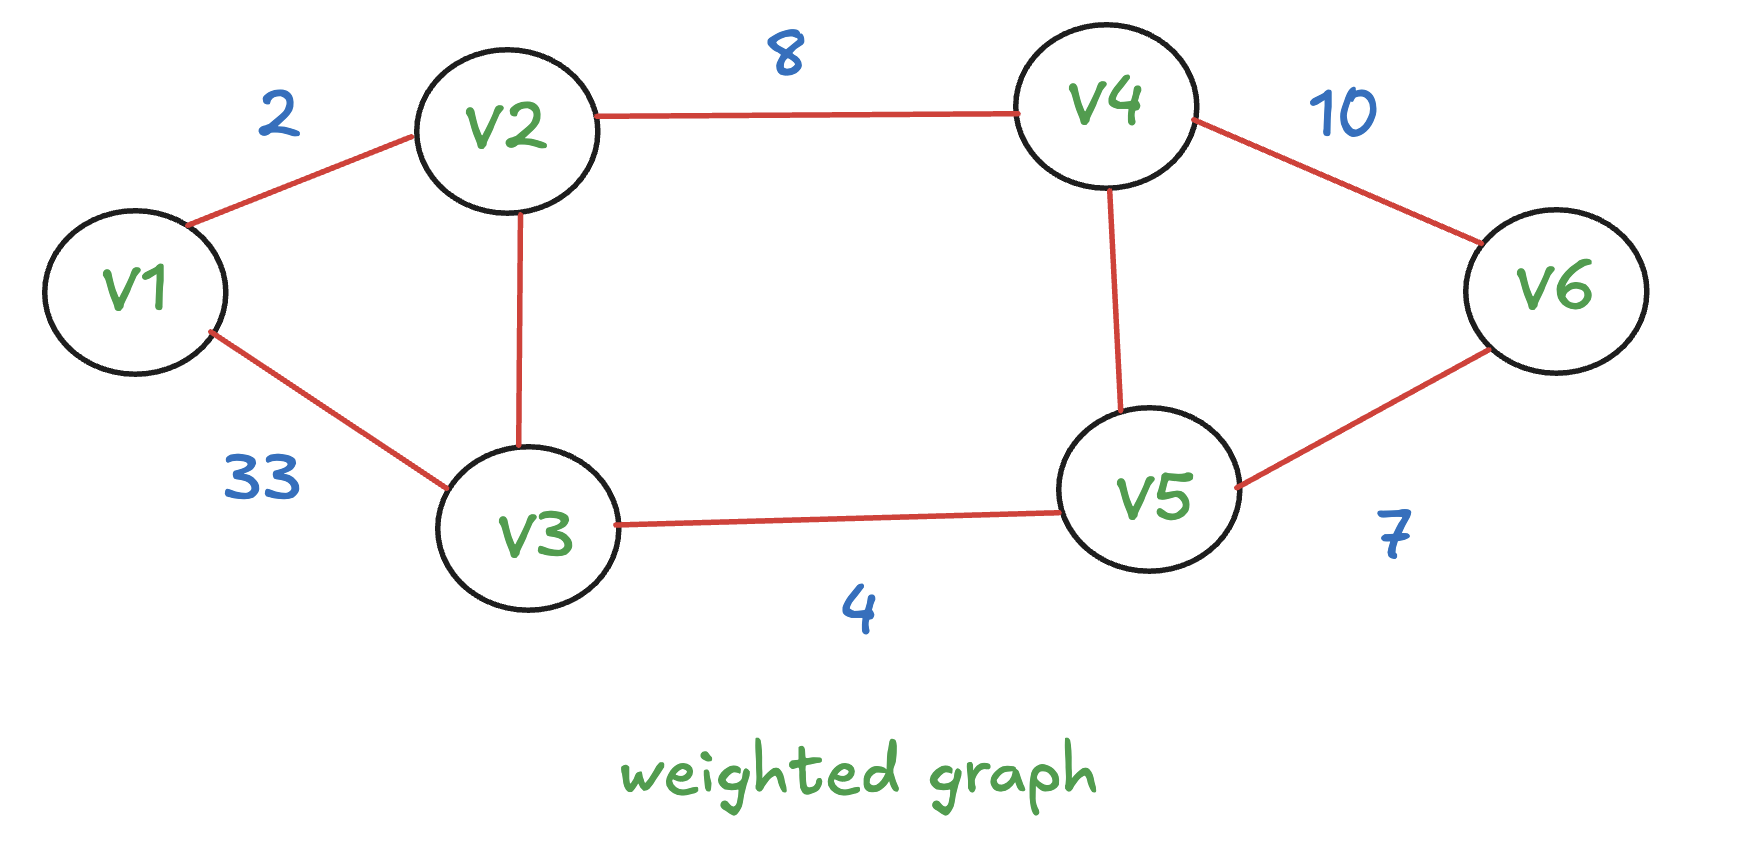
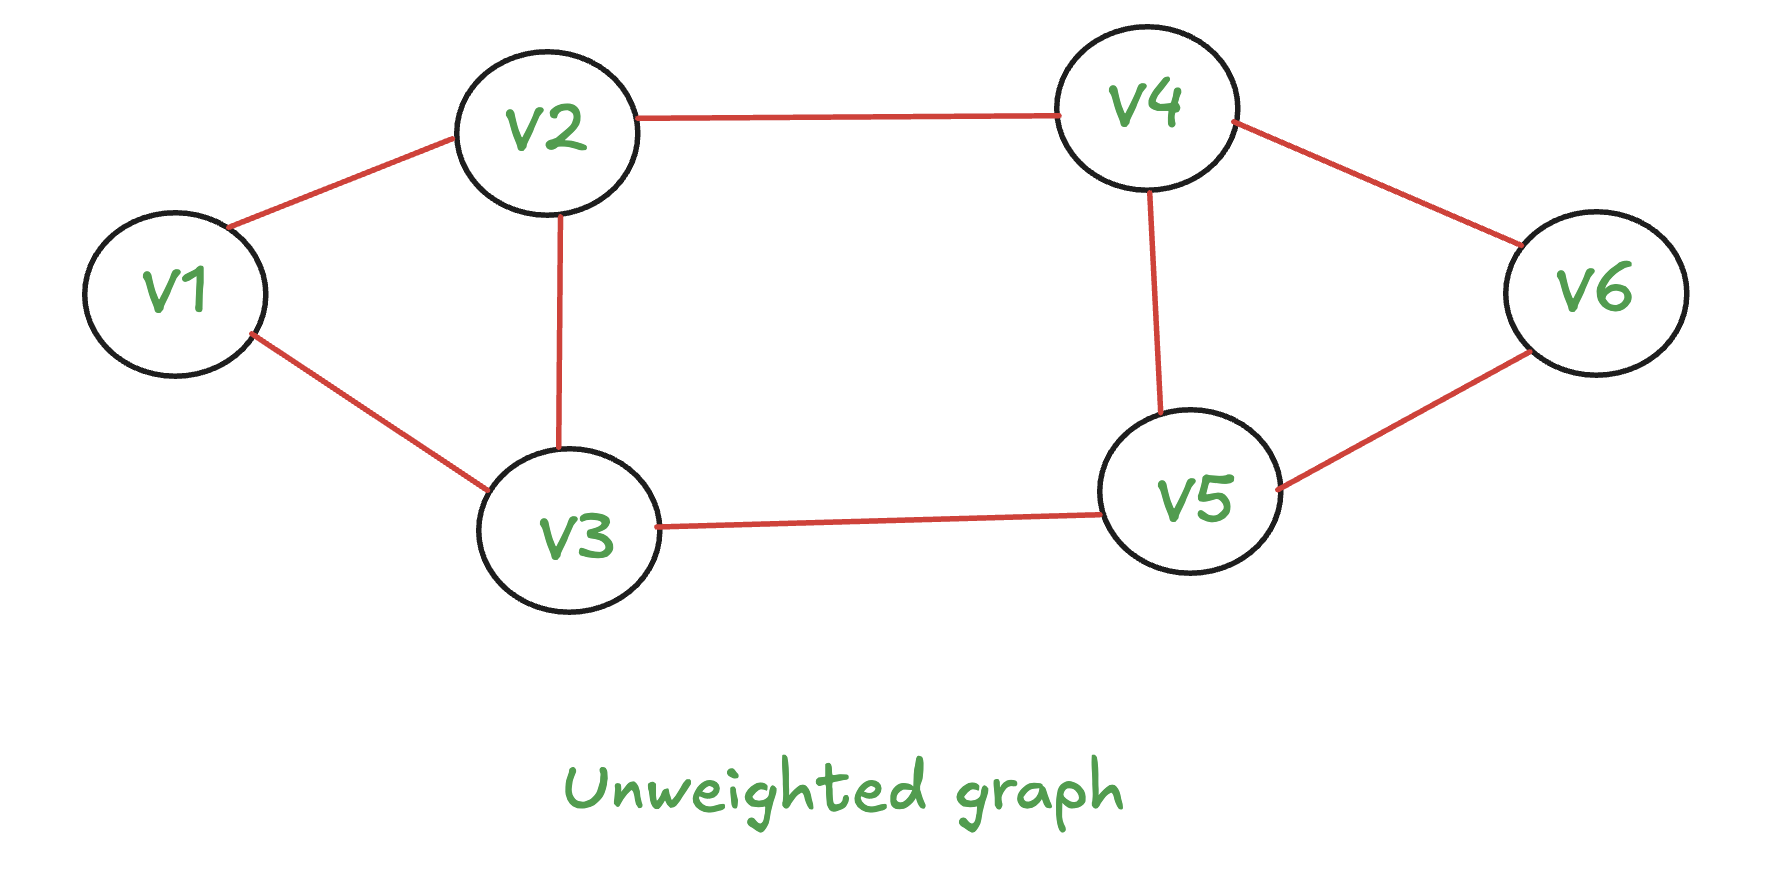


# Adding and Printing elements of a graph in adjacency matrix

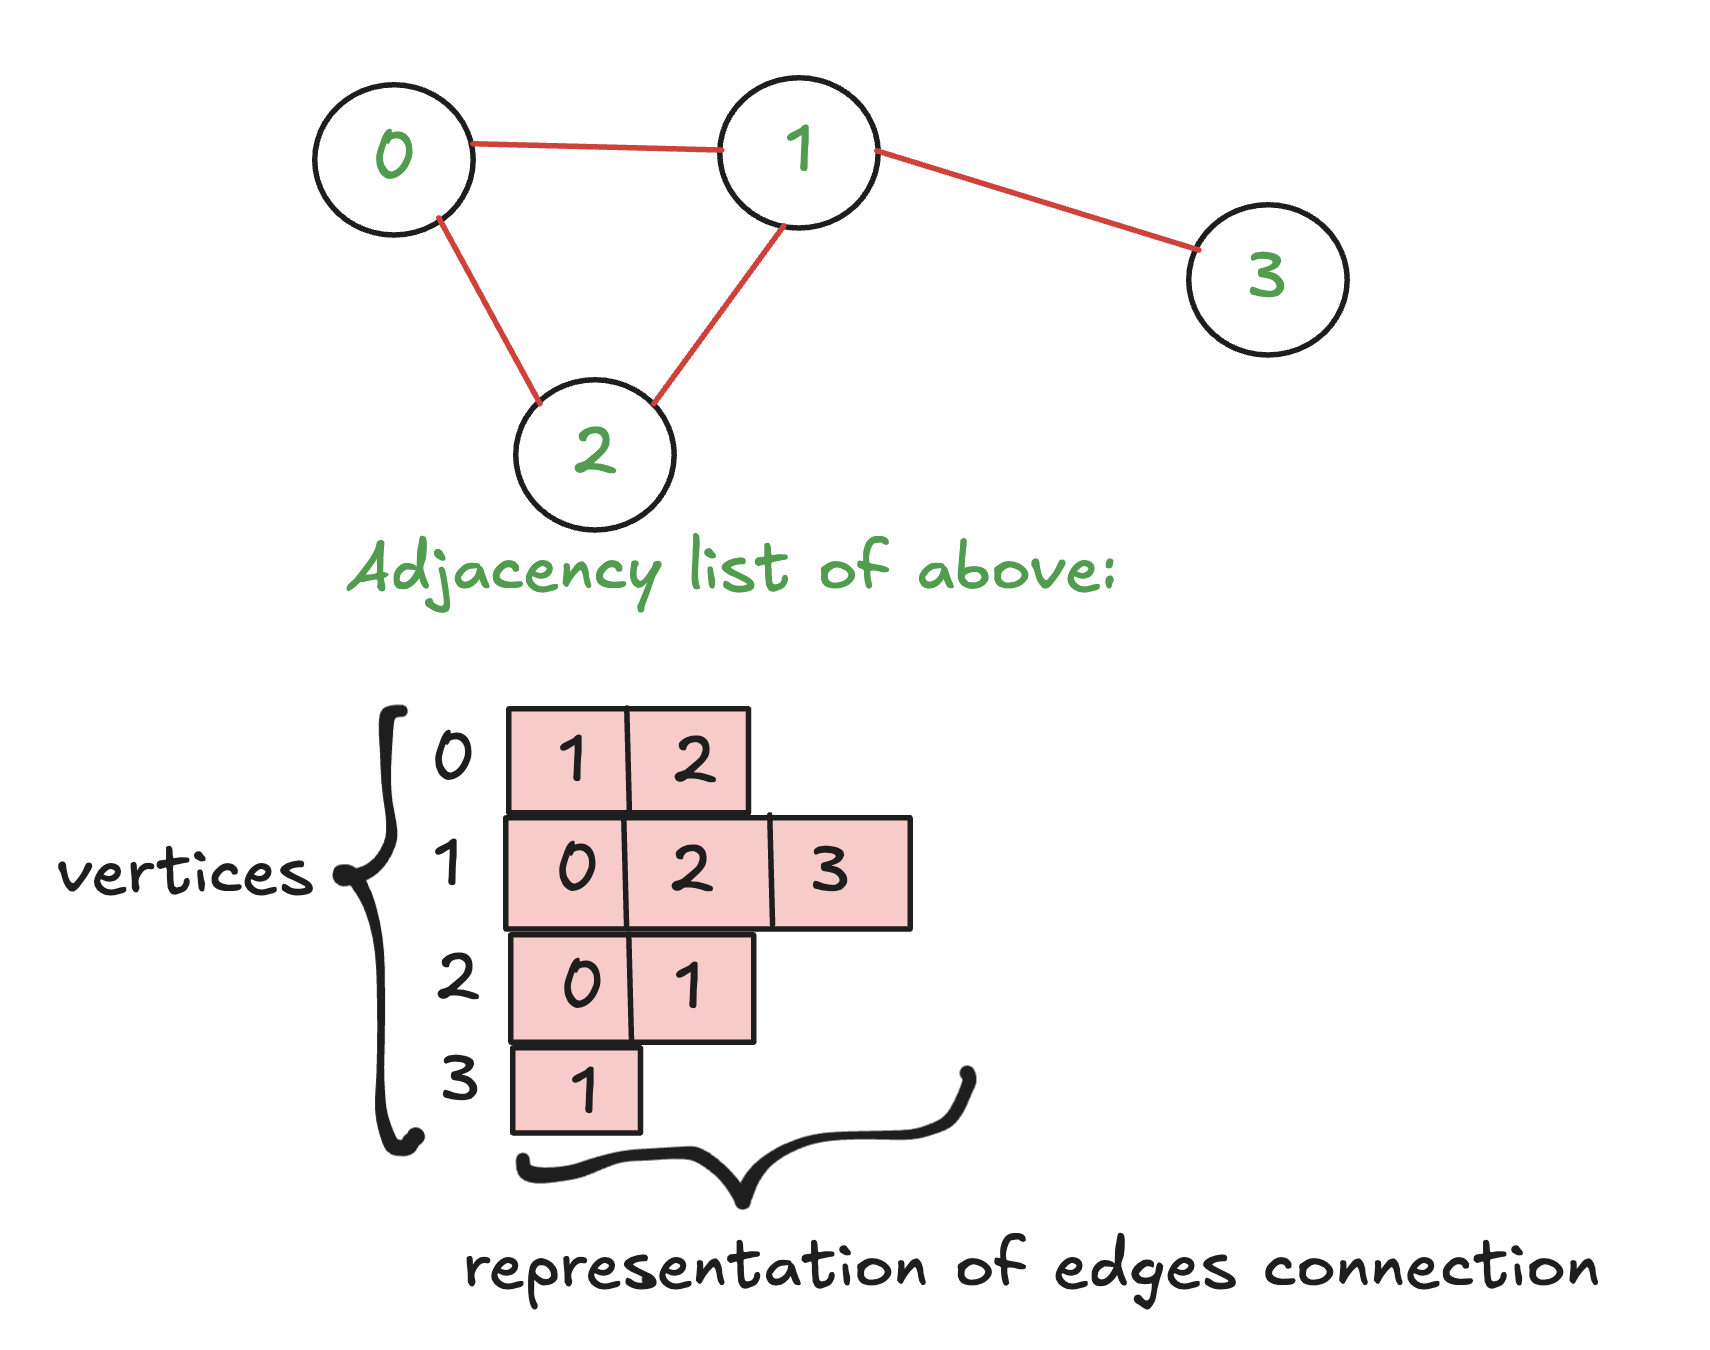

In [6]:
def add_graph(arr, u, v):
    arr[u].append(v)

def print_graph(arr):
    for i in range(len(arr)):
        for j in range(len(arr[i])):
            print(arr[i][j], end=" ")

        print("\n")

V = 4
adj_lst = [[] for _ in range(V)]
print(f"Initialized Adjacency List: {adj_lst}")
add_graph(adj_lst, 0, 1)
add_graph(adj_lst, 0, 2)
add_graph(adj_lst, 1, 0)
add_graph(adj_lst, 1, 2)
add_graph(adj_lst, 1, 3)
add_graph(adj_lst, 2, 0)
add_graph(adj_lst, 2, 1)
add_graph(adj_lst, 3, 1)

print(adj_lst)
print_graph(adj_lst)




Initialized Adjacency List: [[], [], [], []]
[[1, 2], [0, 2, 3], [0, 1], [1]]
1 2 

0 2 3 

0 1 

1 



- BFS: Bredth First Search
Here we scan to all the adjacent nodes of a graph. We use an adjacency matrix with a queue to traverse through all the adjacent nodes

In [3]:
from collections import deque
def BFS(adj_arr, s):
    """
    adj_arr: Represents the adjacency matrix
    s : the source node
    """

    queue = []
    visited = [False]*len(adj_arr)

    queue.append(s)
    visited[s] = True

    while queue:
        w = queue.popleft()
        print(w)

        if visited[w] == False:
            for i in adj_arr[w]:
                queue.append(i)
                visited[w] = True

- DFS: Depth First Search
Here we start with a node and recursively go inside the node till we reach the last node of the graph. Then we backtrack and go to different node

In [1]:
def DFS_Rec(adj_arr, s, visited):
    visited[s] = True
    print(s)

    for i in adj_arr[s]:
        if visited[i] == False:
            DFS_Rec(adj_arr, s, visited)

def DFS(adj_arr, s):
    visited = [False]*len(adj_arr)
    DFS_Rec(adj_arr, s, visited)


- Detected Cycle in an undirected graph

In [ ]:
"""Detecting Cycles using DFS"""
def DFS_Rec(adj_arr, s, visited, parent):
    visited[s] = True
    
    for u in adj_arr[s]:
        if visited[u] == False:
            #if previoius function returned True
            if DFS_Rec(adj_arr, u, visited, s):
                #Then return true
                return True
            
            #If parent and child both are different and if the child is already visited
            elif u != s and visited[u] == True:
                return True
            
        return False


def DFS(adj):
    visited = [False]*len(adj)

    for i in range(len(adj)):
        if visited[i] == False:
            if DFS_Rec(adj, i, visited, -1):
                return True

## Detecting a cycle using BFS

In [1]:
#for checking all the nodes
from collections import deque
def detectCycle(adj_arr, visited, s):
    q = deque()
    #append source node and parent
    q.append([s, -1])

    #traverse all the eleemnts till the queue is empty
    while q:
        #extract the node and parent
        w = q.popleft()
        node = w[0]
        parent = w[1]

        for adjNodes in adj_arr[node]:
            if visited[adjNodes] == False:
                q.append(adjNodes)
                visited[adjNodes] = True

            elif adjNodes != parent:
                return True
            
        return False

def isCycle(adj_arr, s):
    visited = [False]*len(adj_arr)
    visited[s] = True
    
    for i in len(adj_arr):
        if visited[i] == False:
            detectCycle(adj_arr, visited, s)

        return False

## Deteciting a cycle in directed graph